In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plotly.express as px
import pandas as pd
!pip install squarify -qqq
import squarify

df = pd.read_csv('soci_econ_country_profiles.csv')

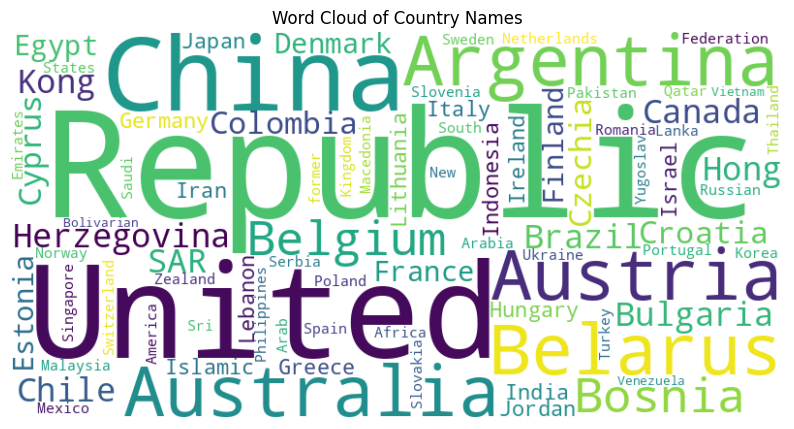

In [ ]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['country']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Country Names')
plt.show()

Observation: The word cloud provides a visual representation of the frequency of country names in the dataset. Larger words indicate more frequent appearances. This plot helps in identifying dominant countries or regions.

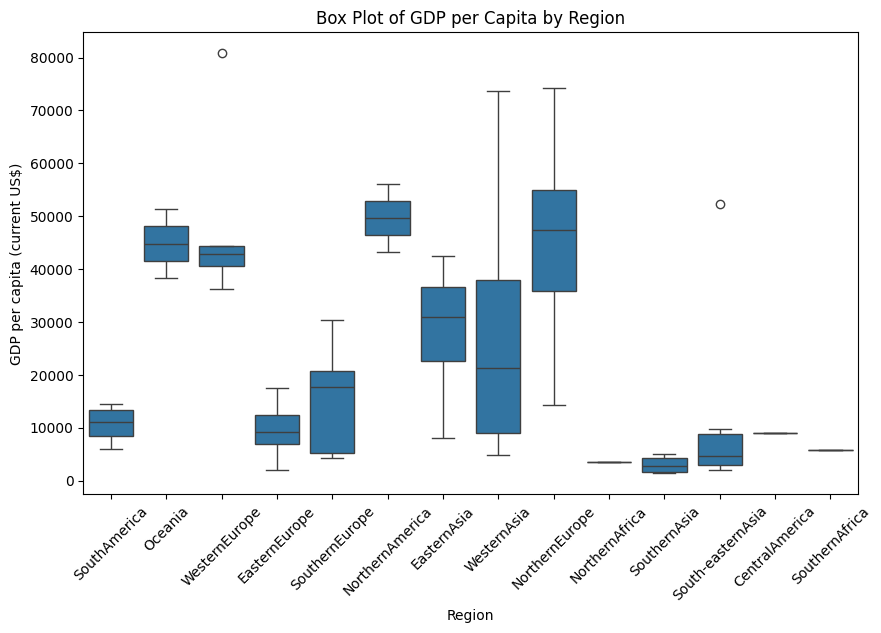

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='GDP per capita (current US$)', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of GDP per Capita by Region')
plt.show()

Observation: The plot shows the distribution of GDP per capita across different regions. Regions with high outliers or wider interquartile ranges, such as Western Europe, indicate greater economic disparity within those regions.

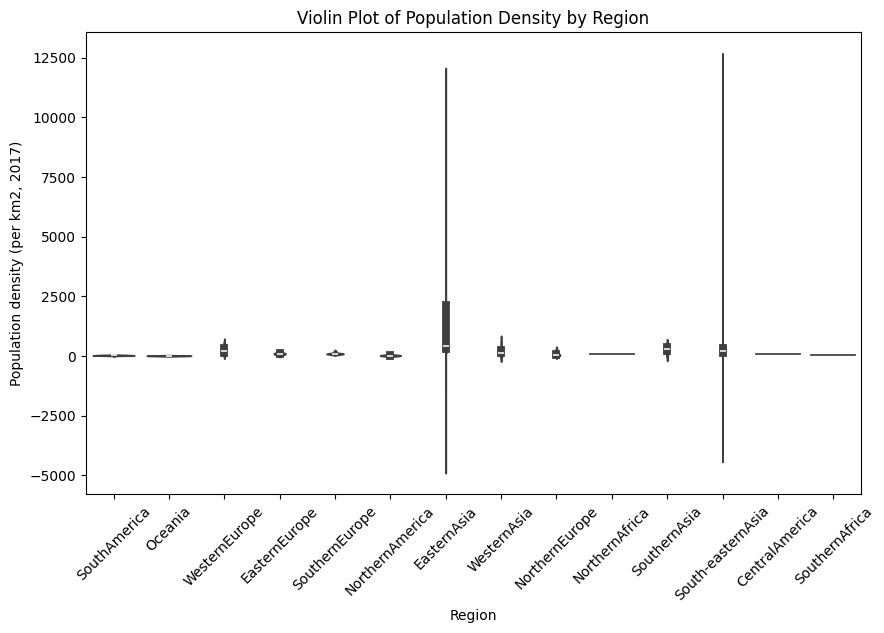

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Region', y='Population density (per km2, 2017)', data=df)
plt.xticks(rotation=45)
plt.title('Violin Plot of Population Density by Region')
plt.show()

Observation: This plot shows the population density distribution for each region. Regions like South America show a broad distribution, whereas others like Oceania have a tighter density range.

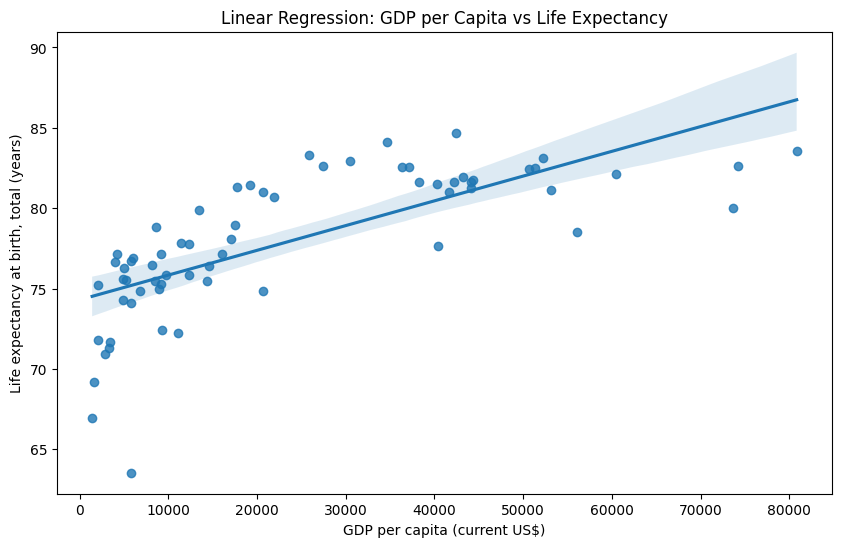

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per capita (current US$)', y='Life expectancy at birth, total (years)', data=df)
plt.title('Linear Regression: GDP per Capita vs Life Expectancy')
plt.show()

Observation: There is a positive correlation between GDP per capita and life expectancy. As GDP per capita increases, life expectancy tends to increase, suggesting a direct link between economic prosperity and health.

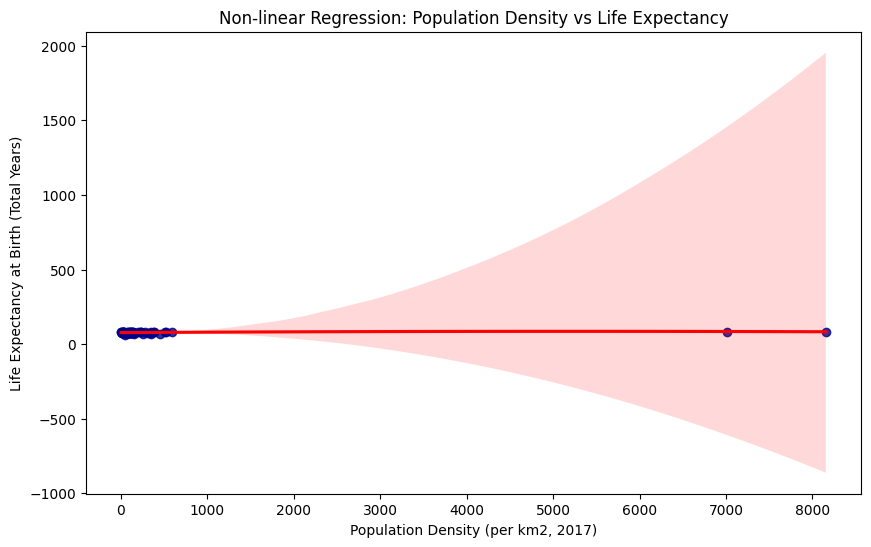

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Population density (per km2, 2017)', y='Life expectancy at birth, total (years)',
            data=df, scatter_kws={"color": "darkblue"}, line_kws={"color": "red"}, order=2)
plt.title('Non-linear Regression: Population Density vs Life Expectancy')
plt.xlabel('Population Density (per km2, 2017)')
plt.ylabel('Life Expectancy at Birth (Total Years)')
plt.show()

Observation: The non-linear regression plot illustrates the relationship between Population Density (per km²) and Life Expectancy (total years) across various countries. The curve shows that life expectancy generally increases with population density up to a certain threshold. However, beyond this threshold

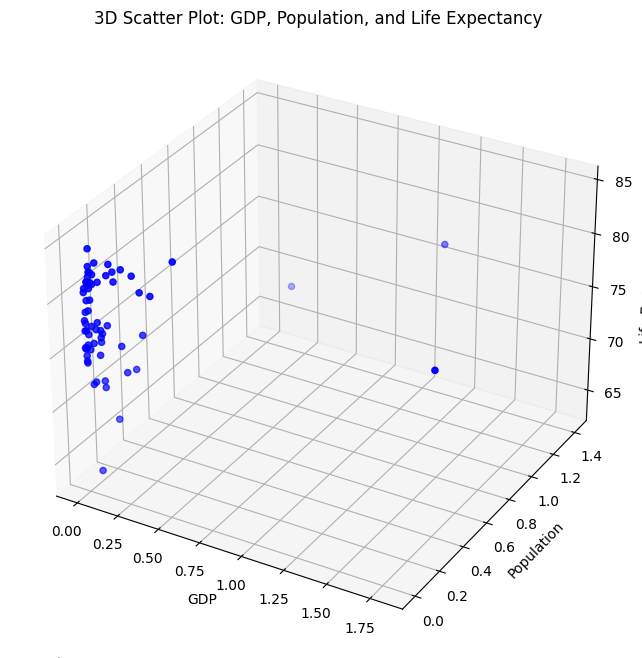

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['GDP: Gross domestic product (million current US$)'], df['Population in thousands (2017)'], df['Life expectancy at birth, total (years)'], c='b', marker='o')
ax.set_xlabel('GDP')
ax.set_ylabel('Population')
ax.set_zlabel('Life Expectancy')
plt.title('3D Scatter Plot: GDP, Population, and Life Expectancy')
plt.show()

Observation: This plot shows how GDP, population, and life expectancy interact. Larger populations don’t always correspond to higher GDP or life expectancy, reflecting varying economic efficiencies.

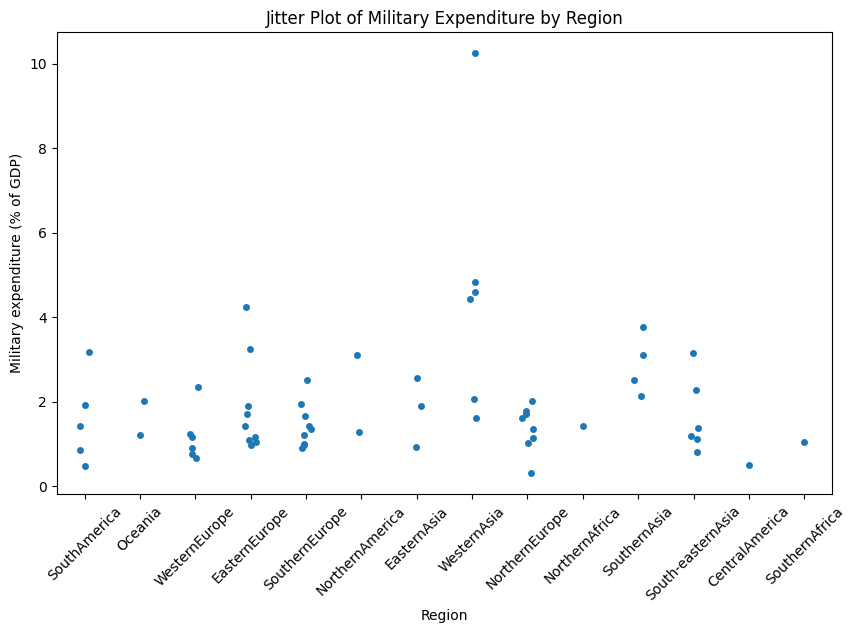

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Region', y='Military expenditure (% of GDP)', data=df, jitter=True)
plt.xticks(rotation=45)
plt.title('Jitter Plot of Military Expenditure by Region')
plt.show()

Observation: Military expenditure varies greatly within and across regions. This plot helps in identifying outliers and the general trend of defense spending in different parts of the world.

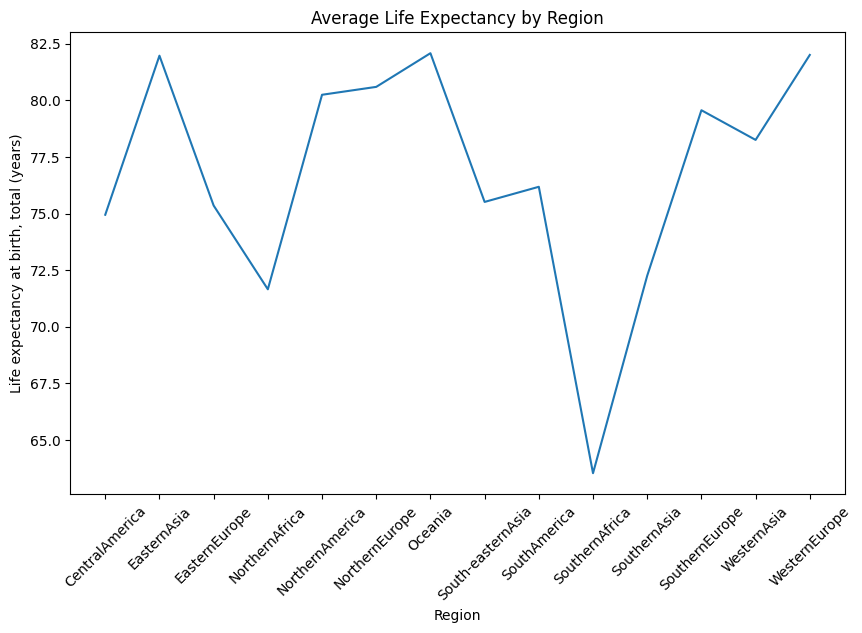

In [ ]:
df_life_exp = df.groupby('Region')['Life expectancy at birth, total (years)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Region', y='Life expectancy at birth, total (years)', data=df_life_exp)
plt.xticks(rotation=45)
plt.title('Average Life Expectancy by Region')
plt.show()

Observation: The average life expectancy by region highlights the disparities in health outcomes. Western Europe and Oceania have the highest life expectancy, while other regions like Eastern Europe lag.

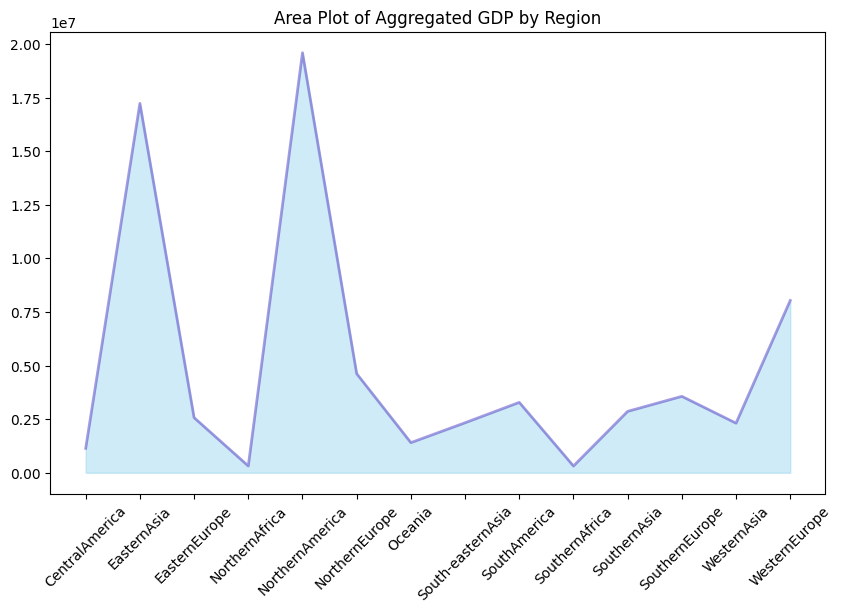

In [ ]:
df_gdp = df.groupby('Region')['GDP: Gross domestic product (million current US$)'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.fill_between(df_gdp['Region'], df_gdp['GDP: Gross domestic product (million current US$)'], color="skyblue", alpha=0.4)
plt.plot(df_gdp['Region'], df_gdp['GDP: Gross domestic product (million current US$)'], color="Slateblue", alpha=0.6, linewidth=2)
plt.xticks(rotation=45)
plt.title('Area Plot of Aggregated GDP by Region')
plt.show()

Observation: The area plot visualizes the aggregated GDP across different regions. Regions like Western Europe and North America show higher GDP contributions, reflecting their economic strength. This plot highlights economic disparities between regions, with certain areas contributing significantly more to the global economy than others. It underscores the concentration of wealth in specific regions, while others, particularly developing regions, contribute less economically.

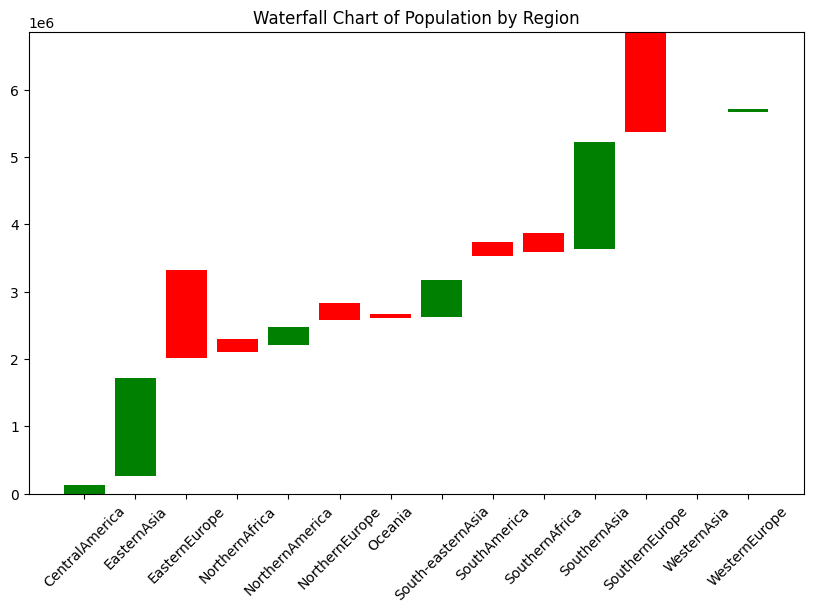

In [ ]:
population_by_region = df.groupby('Region')['Population in thousands (2017)'].sum().reset_index()
population_by_region['previous'] = population_by_region['Population in thousands (2017)'].shift(1, fill_value=0)
population_by_region['difference'] = population_by_region['Population in thousands (2017)'] - population_by_region['previous']
population_by_region['total'] = population_by_region['Population in thousands (2017)'].cumsum()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(population_by_region['Region'], population_by_region['difference'], bottom=population_by_region['total'] - population_by_region['difference'], color=(population_by_region['difference'] > 0).map({True: 'green', False: 'red'}))
plt.title('Waterfall Chart of Population by Region')
plt.xticks(rotation=45)
plt.show()

Observation: This chart visualizes cumulative population changes across regions. It effectively shows how each region contributes to the global population, with significant differences across regions.

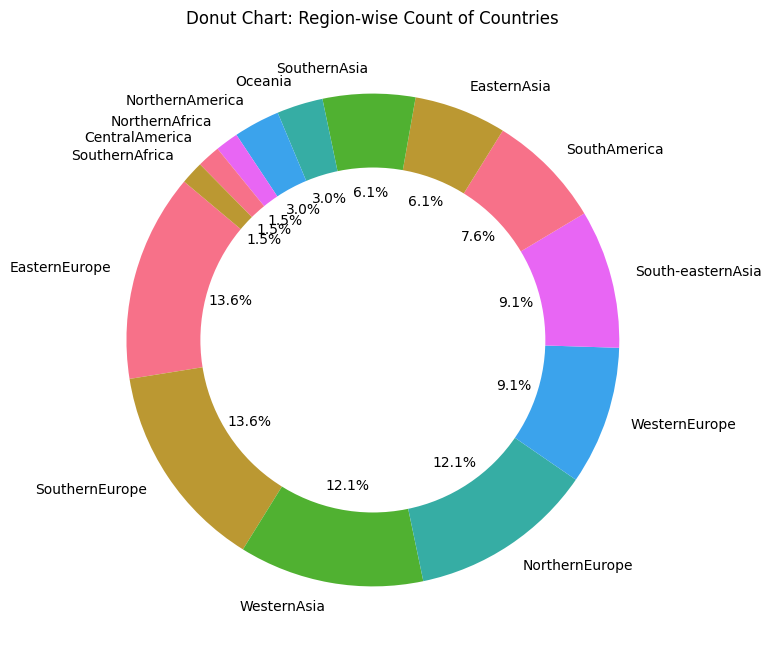

In [ ]:
region_count = df['Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(region_count, labels=region_count.index, wedgeprops=dict(width=0.4), startangle=140, autopct='%1.1f%%', colors=sns.color_palette('husl'))
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.title('Donut Chart: Region-wise Count of Countries')
plt.show()

Observation: The chart shows the proportion of countries within each region. It highlights regions with a higher number of countries, such as Western Europe, compared to regions with fewer countries.

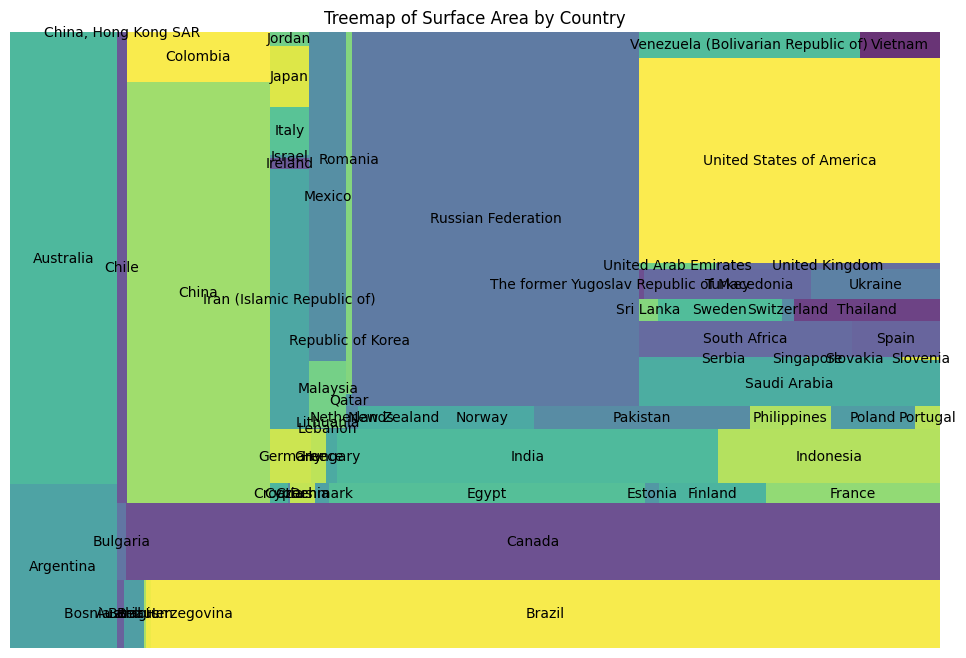

In [ ]:
sizes = df['Surface area (km2)']
labels = df['country']
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis('off')
plt.title('Treemap of Surface Area by Country')
plt.show()

Observation:The treemap visualizes the surface area of various countries, with each rectangle representing a country. Larger rectangles indicate countries with more significant land areas, such as Russia, Canada, China, and the United States, which dominate the map. Smaller rectangles represent countries with smaller land areas, often those in Europe or island nations. This visualization effectively highlights the vast differences in land area between countries and allows for a quick comparison of the relative sizes of nations worldwide.

In [ ]:
funnel_fig = px.funnel(population_by_region, x='Region', y='Population in thousands (2017)')
funnel_fig.show()

Observation: The funnel chart presents a decreasing population size from one region to the next, illustrating the concentration of population across various regions.